In [10]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_circles


In [13]:
sns.set_theme()

## Crear el dataset

In [262]:
nro_regis = 500
features = 2
x_data, y_data = make_circles(n_samples=nro_regis, factor=0.5, noise=0.05)

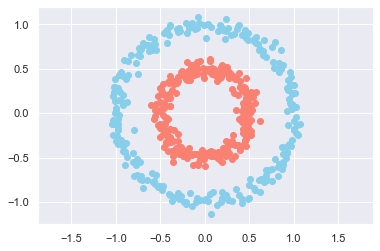

In [263]:
plt.scatter(x_data[y_data==0, 0], x_data[y_data==0, 1], c="skyblue")
plt.scatter(x_data[y_data==1, 0], x_data[y_data==1, 1], c="salmon")
plt.axis("equal")
plt.show()

## Clase de la capa de la red

### Funciones de activación

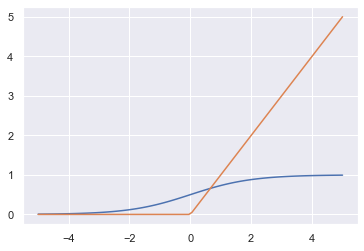

In [60]:
sigm = lambda x: 1 / (1 + np.e ** (-x)) 

relu = lambda x: np.maximum(0, x)

_X = np.linspace(-5, 5, 100)
plt.plot(_X, sigm(_X))
plt.plot(_X, relu(_X))

In [264]:
class NeuralLayer:
    def __init__(self, n_con, n_neuron, act_f='sigma', learn_rate=0.5):
        self.n_con = n_con
        self.n_neuron = n_neuron
        self.bias = np.random.rand(1, n_neuron) * 2 - 1
        self.weight = np.random.rand(n_con, n_neuron) * 2 - 1
        self.act_fun, self.act_der = self.build_funct(act_f)
        self.learn_rate = learn_rate

    @staticmethod
    def build_funct(act_f):
        if act_f == 'sigma':
            return (lambda x: 1 / (1 + np.e ** (-x)), lambda x: x * (1 - x))
        elif act_f == 'relu':
            return (lambda x: np.maximum(0, x), 1)

    def suma_pond(self, input):
        self.z = input @ self.weight + self.bias  # Suma ponderada
        self.a = self.act_fun(self.z)  # Funcion de activacion sobre la suma ponderada

        

In [265]:
def create_nn(topology, act_f):
    nn = []
    for layer1, layer2 in zip(topology[:-1], topology[1:]):
        nn.append(NeuralLayer(layer1, layer2, func_act))
        print(nn[-1].weight.shape)
    return nn

In [266]:
func_act = 'sigma'
f_cost, der_costo = (lambda yp, yr: np.mean((yp - yr) ** 2), lambda yp, yr: yp - yr)
topology = [features, 4, 8, 16, 8, 1]
neural_net = create_nn(topology, 'sigma')

(2, 4)
(4, 8)
(8, 16)
(16, 8)
(8, 1)


In [267]:
def train(neural_net, x_data, y_data, lr=0.05, train=True):
    out = [(None, x_data)]
    for layer in neural_net:
        layer.suma_pond(out[-1][1])
        out.append((layer.z, layer.a))        
    
    if train:
        # Backward pass
        deltas = []
        iter = len(out)-1
        
        for index, layer in enumerate(neural_net[::-1]): 
            if not deltas:
                # Calcular delta ultima capa
                deltas.append(der_costo(layer.a, y_data) * layer.act_fun(layer.a))
            else:
                # Calcular demás deltas
                deltas.append(deltas[-1] @ w_actual * layer.act_fun(layer.a))
            
            w_actual = layer.weight.T
            layer.bias = layer.bias - np.mean(deltas[-1], axis=0, keepdims=True) * lr
            layer.weight =  layer.weight - out[iter-1][1].T @ deltas[-1] * lr
            iter -= 1
    return out[-1][1]

In [268]:
pY = train(neural_net, x_data, new_y_data, train=True)

In [269]:
import time
from IPython.display import clear_output
topology = [features, 4, 8, 1]
neural_net = create_nn(topology, 'sigma')

loss = []

for i in range(1000):
    # Entrenar la red!
    pY = train(neural_net, x_data, new_y_data, train=True)

    if i % 25 == 0:
        loss.append(f_cost(pY, y_data))
        res = 50

        _x0 = np.linspace(-1.5, 1.5, res)
        _x1 = np.linspace(-1.5, 1.5, res)

        _Y = np.zeros((res, res))

        for i0, x0 in enumerate(_x0):
            for i1, x1 in enumerate(_x1):
                _Y[i0, i1] = train(neural_net, np.array([[x0, x1]]), y_data, train=False)[0][0]

        plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
        plt.axis("equal")
        print(i)

        plt.scatter(x_data[y_data==0, 0], x_data[y_data==0, 1], c="skyblue")
        plt.scatter(x_data[y_data==1, 0], x_data[y_data==1, 1], c="salmon")

        clear_output(wait=True)
        plt.show()
        plt.plot(range(len(loss)), loss)
        plt.show()
        time.sleep(0.5)

KeyboardInterrupt: 